Buscad un conjunto de datos a analizar
Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [1]:
# Importamos las librerías que necesitamos:

# para el tratamiento de los datos:

import pandas as pd
import numpy as np

# para visualizarlos:

import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos un tamaño común para todas las gráficas:

plt.rcParams["figure.figsize"] = (10,8)

# Configuramos los warnings:

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = None

In [4]:
# Hemos obtenido de internet un dataset que recopila datos sobre el estilo de vida y el bienestar:
df = pd.read_csv("../PAIR_PROG_SPRINT1/dataset/Wellbeing_and_lifestyle_data_Kaggle.csv", index_col= 0)
df.head(7)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
Timestamp,,,,,,,,,,,,,,,,,,,,,,,
7/7/15,3,2,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,36 to 50,Female,609.5
7/7/15,2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,36 to 50,Female,655.6
7/7/15,2,3,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,36 to 50,Female,631.6
7/7/15,3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,51 or more,Female,622.7
7/7/15,5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,51 or more,Female,663.9
7/8/15,3,2,3,9,10,10,2,3,1,6,1,7,10,8,0,2,2,10,8,3,51 or more,Female,722.3
7/8/15,4,2,10,6,10,10,3,5,2,8,8,7,5,7,10,0,2,10,8,10,51 or more,Male,727.2


In [5]:
df.shape 

(15972, 23)

Nuestro dataset tiene originalmente 23 filas y 15972 filas, para optimizar el trabajo vamos a descartar algunas de las columnas.

In [6]:
df.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [7]:
df1 = df.drop(['PLACES_VISITED','SUPPORTING_OTHERS','ACHIEVEMENT','DONATION','TODO_COMPLETED', 'FLOW','TODO_COMPLETED', 'FLOW','LOST_VACATION', 'DAILY_SHOUTING','PERSONAL_AWARDS','LIVE_VISION'], axis = 1)

In [8]:
df1.columns

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'CORE_CIRCLE', 'SOCIAL_NETWORK',
       'BMI_RANGE', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [13]:
df1['DAILY_STRESS']=df1['DAILY_STRESS'].astype('category')
df1['BMI_RANGE']=df1['BMI_RANGE'].astype('category')
df1['SUFFICIENT_INCOME']=df1['SUFFICIENT_INCOME'].astype('category')

Hemos seleccionado las columnas que más creemos que puedan influir en el bienestar:

FRUITS_VEGGIES           nº fruta por día

DAILY_STRESS             nivel diario estrés

CORE_CIRCLE              nº de personas cercanas

SOCIAL_NETWORK           nº interacciones por dia en rrss

BMI_RANGE                masa corporal  índice

DAILY_STEPS              nº pasos diarios (1000)

SLEEP_HOURS              horas sueño por dia

SUFFICIENT_INCOME        salario

TIME_FOR_PASSION         horas/día

WEEKLY_MEDITATION        nº veces/semana
AGE

GENDER                   15972 non-null  object

WORK_LIFE_BALANCE_SCORE  15972 non-null  float64

In [14]:
df1.shape

(15972, 13)

In [15]:
df1.head(4)

,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
Timestamp,,,,,,,,,,,,,
7/7/15,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
7/7/15,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6
7/7/15,2,3,4,10,2,4,8,2,8,3,36 to 50,Female,631.6
7/7/15,3,3,3,7,2,5,5,1,2,0,51 or more,Female,622.7


In [16]:
# vamos a resetear el índice:
df1.reset_index(inplace = True)

In [17]:
df1.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,CORE_CIRCLE,SOCIAL_NETWORK,BMI_RANGE,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,5,5,1,5,7,1,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,3,10,2,5,8,2,2,6,36 to 50,Female,655.6


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Timestamp                15972 non-null  object  
 1   FRUITS_VEGGIES           15972 non-null  int64   
 2   DAILY_STRESS             15972 non-null  category
 3   CORE_CIRCLE              15972 non-null  int64   
 4   SOCIAL_NETWORK           15972 non-null  int64   
 5   BMI_RANGE                15972 non-null  category
 6   DAILY_STEPS              15972 non-null  int64   
 7   SLEEP_HOURS              15972 non-null  int64   
 8   SUFFICIENT_INCOME        15972 non-null  category
 9   TIME_FOR_PASSION         15972 non-null  int64   
 10  WEEKLY_MEDITATION        15972 non-null  int64   
 11  AGE                      15972 non-null  object  
 12  GENDER                   15972 non-null  object  
 13  WORK_LIFE_BALANCE_SCORE  15972 non-null  float64 
dtypes: cat

Tenemos 3 columnas categóricas y 10 numéricas

In [19]:
#Hacemos un describe con las variables categóricas:
df1.describe(include="object").T

,count,unique,top,freq
Timestamp,15972,7002,7/23/18,162
AGE,15972,4,21 to 35,6108
GENDER,15972,2,Female,9858


In [20]:
#Hacemos un describe con las numéricas, en este caso no hace falta especificar nada:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
CORE_CIRCLE,15972.0,5.508077,2.840334,0.0,3.0,5.0,8.0,10.0
SOCIAL_NETWORK,15972.0,6.474267,3.086672,0.0,4.0,6.0,10.0,10.0
DAILY_STEPS,15972.0,5.703606,2.891013,1.0,3.0,5.0,8.0,10.0
SLEEP_HOURS,15972.0,7.042888,1.199044,1.0,6.0,7.0,8.0,10.0
TIME_FOR_PASSION,15972.0,3.326572,2.729293,0.0,1.0,3.0,5.0,10.0
WEEKLY_MEDITATION,15972.0,6.233346,3.016571,0.0,4.0,7.0,10.0,10.0
WORK_LIFE_BALANCE_SCORE,15972.0,666.751503,45.019868,480.0,636.0,667.7,698.5,820.2


In [21]:
# Comprobamos si tenemos nulos:
df1.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
CORE_CIRCLE                0
SOCIAL_NETWORK             0
BMI_RANGE                  0
DAILY_STEPS                0
SLEEP_HOURS                0
SUFFICIENT_INCOME          0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [22]:
df1.duplicated().sum()

483

In [23]:
# Tenemos duplicados que vamos a eliminar:
df1.drop_duplicates(inplace = True)

In [24]:
# Verificamos que ya no tengamos duplicados:
df1.duplicated().sum()

0

In [25]:
df1.shape # Vemos que se ha reducido el número de filas:

(15489, 14)

In [26]:
# Vamos a comprobar si nuestras variables numéricas tienen outliers:
df1_numericas = df1.select_dtypes(include = np.number)
df1_numericas.head(2)

,FRUITS_VEGGIES,CORE_CIRCLE,SOCIAL_NETWORK,DAILY_STEPS,SLEEP_HOURS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,3,5,5,5,7,0,5,609.5
1,2,3,10,5,8,2,6,655.6


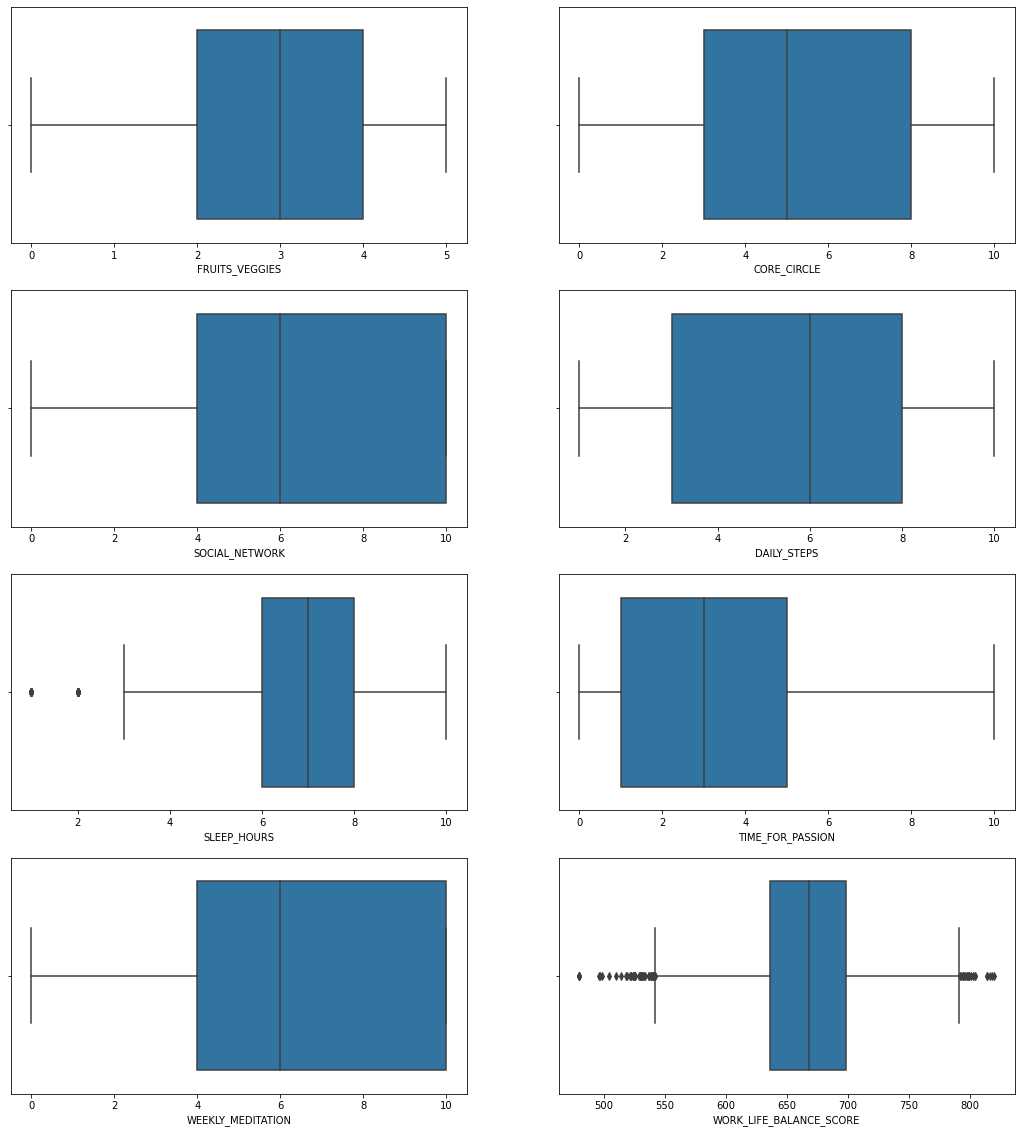

In [41]:
# Vamos a visualizarlas con boxplot:
fig, axes = plt.subplots(4,2, figsize = (18,20))
axes = axes.flat

for indice, columna in enumerate(df1_numericas.columns):
    sns.boxplot(x = df1_numericas[columna], data = df1, ax = axes[indice])

#fig.delaxes(axes[-1]);

Vemos en las gráficas que tenemos muy pocos outliers en "Sleep_hours" y en "Work Balance Score"

In [32]:

def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario que almacene los índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) #si tiene fila es que hay outliers y por tanto lo añadiremos
                                                            #a nuestro diccionario

    return dicc_indices

In [33]:
# Comprobamos los outliers de nuestra variable respuesta:
index_score = detectar_outliers(["WORK_LIFE_BALANCE_SCORE"],df1)
len(index_score["WORK_LIFE_BALANCE_SCORE"])

67

In [34]:
df1.shape

(15489, 14)

In [35]:
lista_indice = index_score["WORK_LIFE_BALANCE_SCORE"]

In [36]:
df1_sin_outliers = df1.drop(lista_indice, axis = 0)

In [37]:
df1_sin_outliers.shape

(15422, 14)

Comprobamos así que hemos pasado de 15286 filas a 15219 al eliminar los outliers de la variable respuesta 

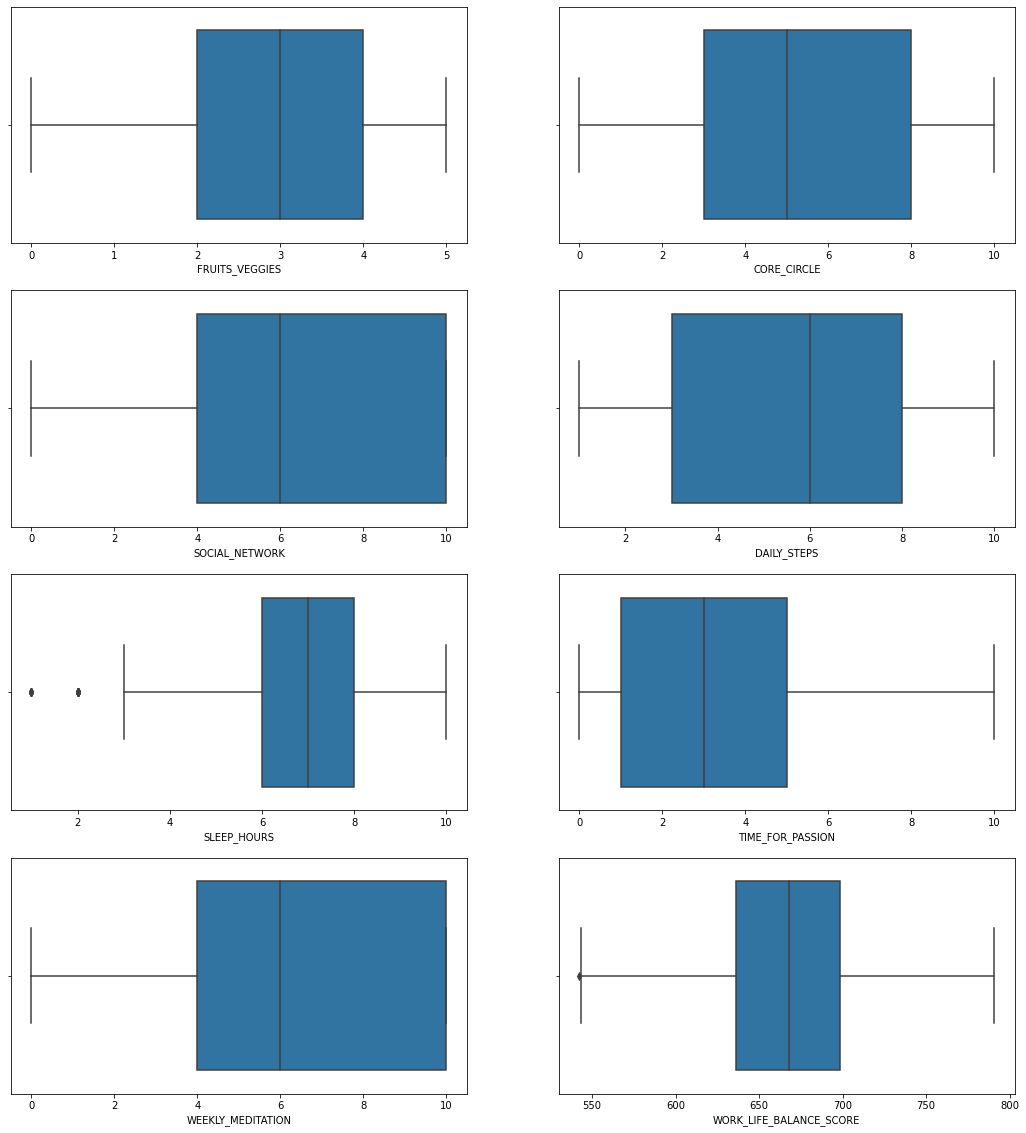

In [42]:
fig, axes = plt.subplots(4,2, figsize = (18,20))
axes = axes.flat

for indice, columna in enumerate(df1_sin_outliers.select_dtypes(include =np.number).columns):
    sns.boxplot(x = df1_sin_outliers[columna], data = df1, ax = axes[indice])

#fig.delaxes(axes[-1]);

Para observar la relación entre la variable respuesta y la variable predictora vamos a hacer gráficas:

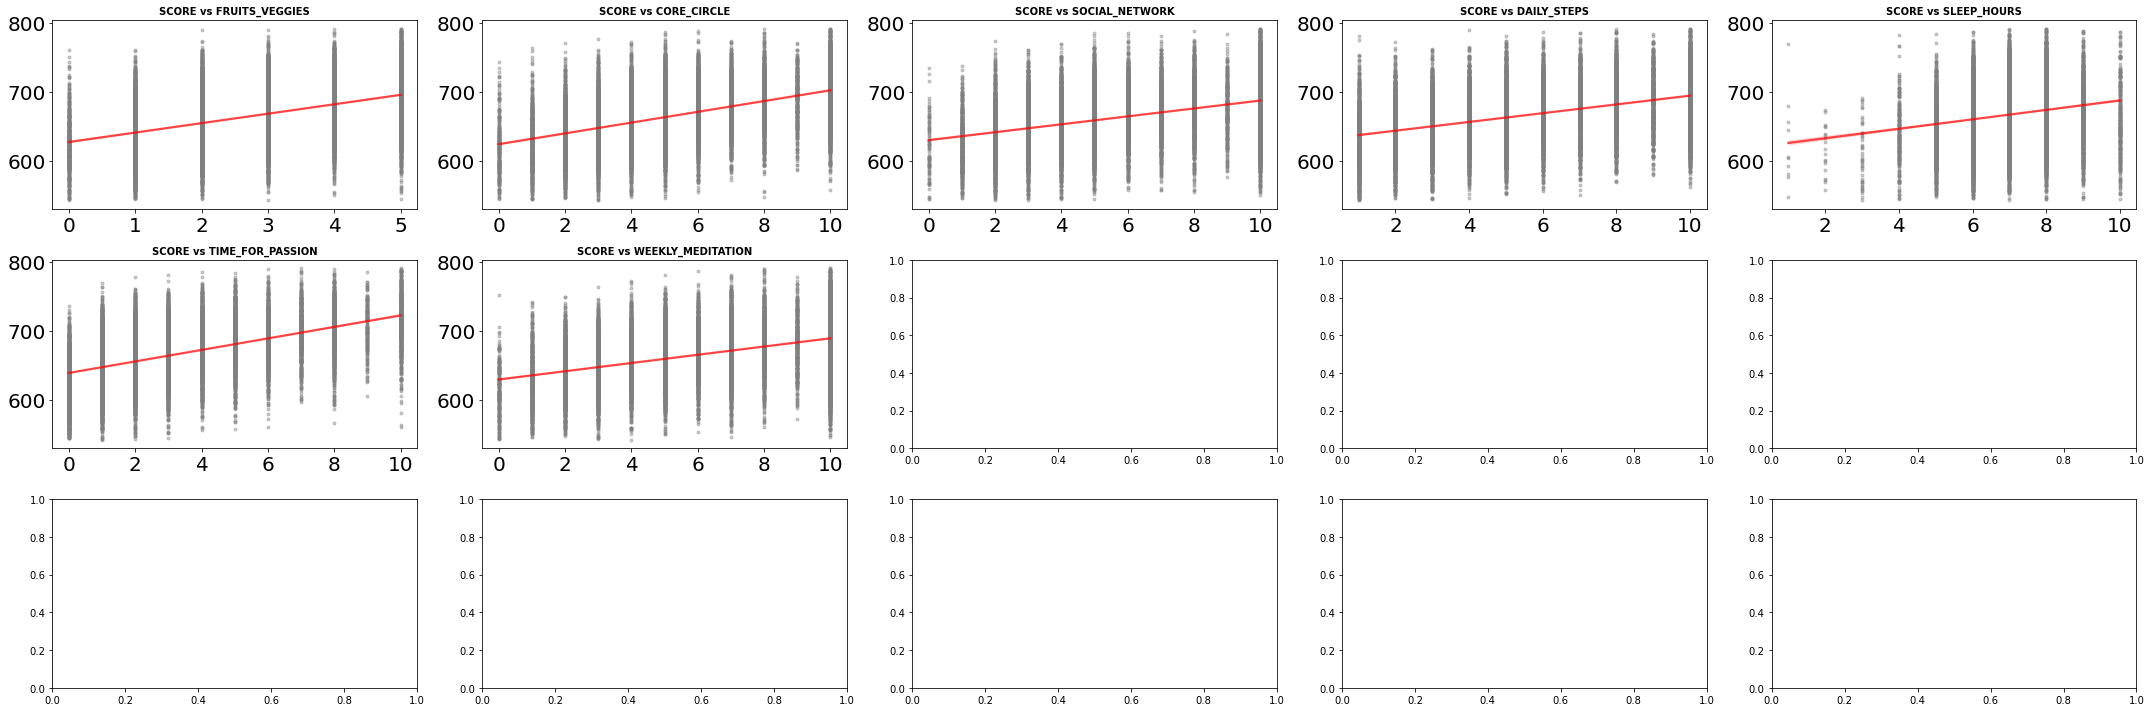

In [43]:
fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (30, 10))

axes = axes.flat

columnas_numeric = df1_sin_outliers.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("WORK_LIFE_BALANCE_SCORE")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df1_sin_outliers[colum], 
        y = df1_sin_outliers["WORK_LIFE_BALANCE_SCORE"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"SCORE vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();


y la correlación entre las variables numéricas:

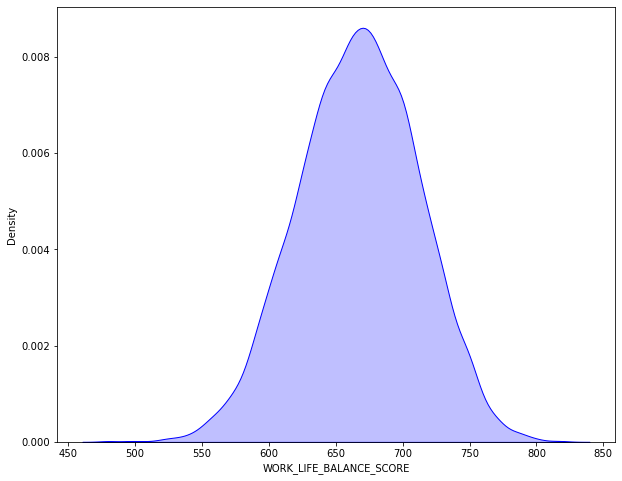

In [44]:
sns.distplot( df["WORK_LIFE_BALANCE_SCORE"], hist = False, color = "blue", kde_kws = {"shade": True, "linewidth": 1}); 

In [46]:
df1.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15489.0,2.922526,1.443384,0.0,2.0,3.0,4.0,5.0
CORE_CIRCLE,15489.0,5.513332,2.839176,0.0,3.0,5.0,8.0,10.0
SOCIAL_NETWORK,15489.0,6.489380,3.084892,0.0,4.0,6.0,10.0,10.0
DAILY_STEPS,15489.0,5.716057,2.887160,1.0,3.0,6.0,8.0,10.0
SLEEP_HOURS,15489.0,7.038479,1.198987,1.0,6.0,7.0,8.0,10.0
TIME_FOR_PASSION,15489.0,3.320873,2.727903,0.0,1.0,3.0,5.0,10.0
WEEKLY_MEDITATION,15489.0,6.222868,3.017561,0.0,4.0,6.0,10.0,10.0
WORK_LIFE_BALANCE_SCORE,15489.0,666.839680,45.002333,480.0,636.0,667.9,698.5,820.2


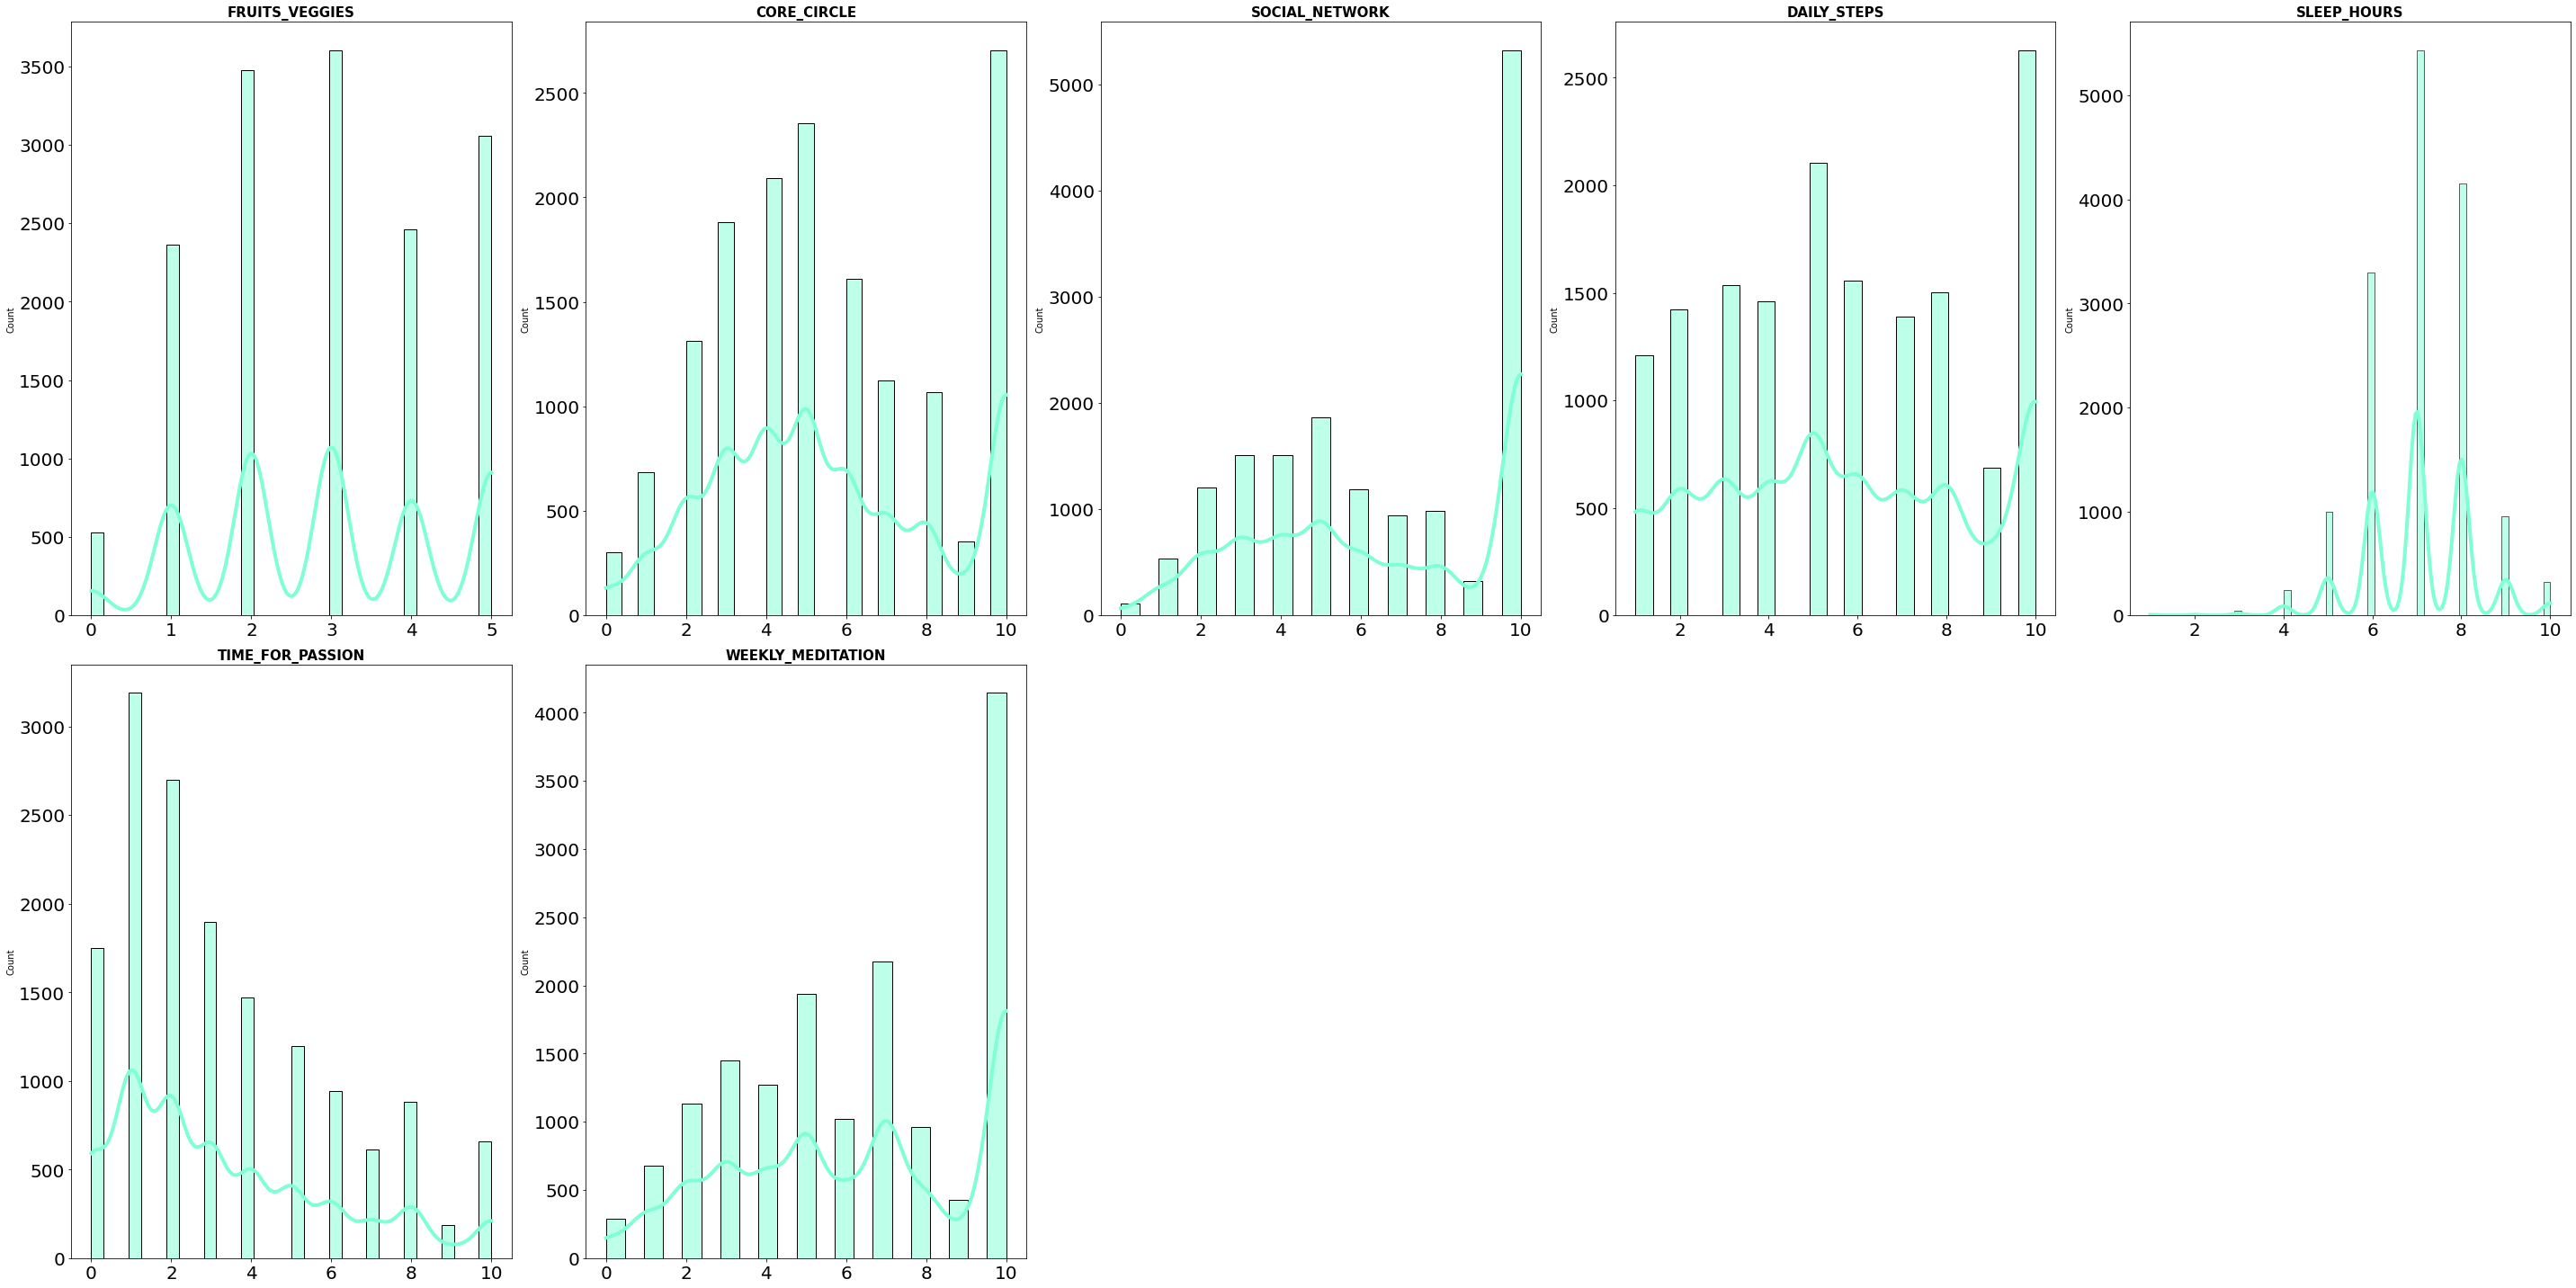

In [53]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (40, 20))


axes = axes.flat

columnas_numeric = df1.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("WORK_LIFE_BALANCE_SCORE")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df1,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 4}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])
fig.delaxes(axes[-3]);

    
